<a href="https://colab.research.google.com/github/sefsnf/PythonForMathematics/blob/main/P4M_Notebook_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 5:  Putting it together...

To wrap things up, we are going to bring together the techniques we have seen, and attempt a few challenges.

Please submit this notebook by 5pm (California time) on Wednesday, March 17th.  Your submission should include answers to all three questions from the first (Repetition and benchmarking) section, and **two** of the challenging problems.

## Repetition and benchmarking

Computers are very good at repetition.  As your programming skills improve, you can more easily coax your computer into performing more repetitions.  We have seen at least three ways of performing repetition:  with loops (e.g, for and while loops), with lists (especially slicing and comprehension), and with numpy arrays (especially vectorized functions).  

It is good to see this, in a simple example, to reflect on what you've learned this quarter.  Our simple example will be producing a list of squares $n^2$ for $n$ in a range of numbers.

The first things we learned were how to use Python as a calculator, printing "answers" to the screen, and using a "for loop" to repeat things.  Here is a bit of code in that spirit.

In [1]:
for n in range(10):
  print(n*n)

0
1
4
9
16
25
36
49
64
81


Then we learned about lists.  Here are two ways to make a list of the squares, from $0^2$ up to $9^2$.  We print the list at the end of each code block.

In [2]:
L = []
for n in range(10):
  L.append(n*n)
print(L)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [3]:
L = [0]*10
for n in range(10):
  L[n] = n*n
print(L)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Hopefully you learned to give your lists better names, like `square_list`.  A very slick Pythonic way of producing a list is with "list comprehension".  Such an approach is in the code below.

In [4]:
square_list = [n*n for n in range(10)]
print(square_list)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Finally, we learned about the numpy package, which pumps arrays through the processor very quickly.  A numpy approach is below.

In [5]:
import numpy as np # First we have to load the package.

In [6]:
A = np.arange(10)
print(A*A)

[ 0  1  4  9 16 25 36 49 64 81]


Let's consider the question:  what is the fastest way to produce a list (or array) of squares?  To answer it, we will wrap things in different functions, and carry out some time analysis.  

Notice that the functions are as identical as possible.  The method of creating a list/array is the different in each function.  But all the functions take a single input `N` and return a list or array with the squares of 0,...,N-1.  Note that there are **no print statements**!  Printing takes time, and we don't care about how much time it takes to *print* a list on your screen.  Also, if we run %timeit, then a print statement will fill your screen with tens of thousands of printed messages!

In [7]:
def make_sq_1(N):
  L = []
  for n in range(N):
    L.append(n*n)
  return L

In [8]:
def make_sq_2(N):
  L = [0] * N
  for n in range(N):
    L[n] = n*n
  return L

In [9]:
def make_sq_3(N):
  return [n*n for n in range(N)]

In [10]:
def make_sq_4(N):
  A = np.arange(N)
  return A*A

In [11]:
%timeit make_sq_1(1000)

220 µs ± 30.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [12]:
%timeit make_sq_2(1000)

62.8 µs ± 13.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [13]:
%timeit make_sq_3(1000)

50.4 µs ± 850 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [14]:
%timeit make_sq_4(1000)

2.05 µs ± 91.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


These benchmarks are useful, but let's do a graphical analysis.  This is the last thing we studied.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns # In case we want some modern stylings.
import time as time

Now we are going to create a graph to benchmark the performance of these three functions.  This will use a few new programming techniques.

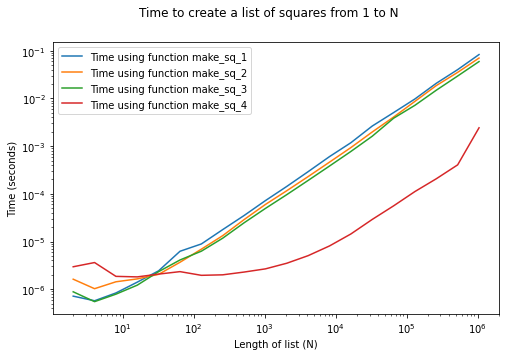

In [16]:
fig,ax = plt.subplots(1,1,figsize=(8,5)) # Initialize a plot.
N_array = np.array([2**n for n in range(1,21)]) # We'll try N in the array [2,4,8,..,~1 million]
for method in [make_sq_1, make_sq_2, make_sq_3, make_sq_4]: # A list of functions, oh my!
  time_array = np.zeros(len(N_array)) # Initialize an array of zeros
  for j,N in enumerate(N_array):  # See notes afterwards about the enumerate command.
    time_tot = 0
    for reps in range(10): # Average of 10 repetitions.
      start_time = time.time()
      method(N)
      end_time = time.time()
      time_tot += end_time - start_time
    time_ave = time_tot / 10
    time_array[j] = time_ave
  plt.plot(N_array, time_array, label='Time using function '+method.__name__)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.suptitle('Time to create a list of squares from 1 to N')
plt.xlabel('Length of list (N)')
plt.ylabel('Time (seconds)')
plt.show()

Let's do a line-by-line analysis.

1.  `fig,ax = plt.subplots(1,1,figsize=(8,5))`

2.  `N_array = np.array([2**n for n in range(1,21)])`

3.  `for method in [make_sq_1, make_sq_2, make_sq_3, make_sq_4]:`

4.  `  time_array = np.zeros(len(N_array)) # Initialize an array of zeros`

5.  `  for j,N in enumerate(N_array):`

6.  `    time_tot = 0`
    `for reps in range(10):`
      `start_time = time.time()`
      `method(N)`
      `end_time = time.time()`
      `time_tot += end_time - start_time`
    `time_ave = time_tot / 10`

    `time_array[j] = time_ave`
7.    `plt.plot(N_array, time_array, label='Time using function '+method.__name__)`

8.  `plt.legend()`

9.  `plt.xscale('log')`
10. `plt.yscale('log')`

Line 1 initializes a plot, with figure size 8 inches by 5 inches.  The "1,1" means that the plot has no subplots, or more precisely, it is a 1 by 1 grid of plots.  (Only one plot).

In line 2, we use a list comprehension to make a list [2,4,8,16,..., 2^20].  Note that 2^20 is about one million.  These are the N's that we're going to work with.

Line 3 might be surprising and interesting.  The variable `method` is iterated through an array of four *functions*!  Yes, we can have a list of functions!  And then we can use those functions!  Functions are Python objects like any other, and they can be treated as such.

Lines 4-6 create an array of times.  Instead of using the %timeit magic, we store our times in an array, and we carry out a timing experiment from scratch.  Line 4 just initializes a numpy array of zeros to fill later.

Line 5 has a new command `enumerate` in the loop.  This makes `N` iterate through our `N_array`, and meanwhile `j` will simply "count up".  It's equivalent to setting `j=0` before the loop, and putting a `j = j + 1` within the loop to count.

Line 6 carries out the timing experiment.  It runs a function (`method`) to create a list of squares up to `N`.  It does this 10 times, checking the time before and after each time.  Then it computes the average amount of time elapsed (among the 10 repetitions) and records this in the `time_array`.

Line 7 plots `N` on the x-axis and time (`time_array`) on the y-axis with a line plot.  It assigns this plot a label, which is the name of the method.  To find the name of the function `method`, you can use `method.__name__`.  That's a bit fancier Python.

Finally, Line 8 produces the legend from the labels.  

Lines 9 and 10 make the x-axis and y-axis log-scaled, which is helpful since the variable `N` is increasing exponentially, and some times are as short as microseconds while others are closer to milliseconds or seconds.

The rest is styling.

## Exercises

1.  Interpret the plot above.  Which method is fastest for long lists?  Which method is fastest for short lists?  At what size `N` should you switch from one method to the other?

2.  Add another method to the plot, by defining your own function `make_sq_5` that mirros the basic structure of the other `make_sq` functions.  Note that your function must create the list in a different way, but it should still take the same parameter `N` and return a list or numpy array.  Create the plot with your function added to the other four, and compare the performance of your method to the others.

3.  Create a function with `def inflate(S):` which takes as input a string `S` and returns a string in which the 1st letter of `S` appears once, and the second letter appears twice, the third letter appears three times, etc.  For example, `inflate('Hello')` should return the string `'Heelllllllooooo'`.  You must use a loop of the form `for j,letter in enumerate(S):`, and *no other loops*!

#1)
The plot in logx,logy has the property that the slope represents the order of growth in complexity, and the height represents the rate of growth (or rather the log of the rate of growth of the order of growth).
The complexity of the numpy method seems to grow the slowest staring at about $n=10^2$. Before then it is a slower method.

In [141]:
# note that i genuinely can't think of a better way to do this.
# im going to be using a method similar to make_sq_4, but wihtout the arrange method, and hope that contributes something useful
def make_sq_5(n):
  N = np.array(range(1,n+1))
  return N*N



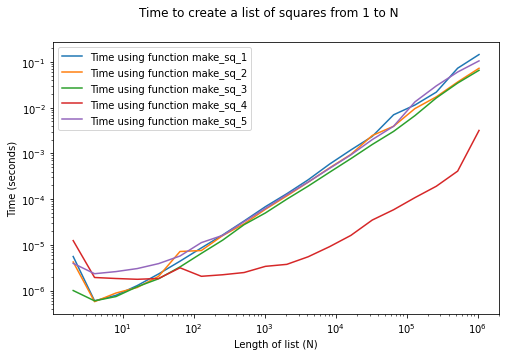

In [139]:
# copy/pasted code form before

fig,ax = plt.subplots(1,1,figsize=(8,5)) 
N_array = np.array([2**n for n in range(1,21)]) 
for method in [make_sq_1, make_sq_2, make_sq_3, make_sq_4, make_sq_5]: # i keep forgetting that you can store/pass functions like varibales in python without funtion handles or smthn. shit's wild
  time_array = np.zeros(len(N_array)) 
  for j,N in enumerate(N_array): 
    time_tot = 0
    for reps in range(10): 
      start_time = time.time()
      method(N)
      end_time = time.time()
      time_tot += end_time - start_time
    time_ave = time_tot / 10
    time_array[j] = time_ave
  plt.plot(N_array, time_array, label='Time using function '+method.__name__)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.suptitle('Time to create a list of squares from 1 to N')
plt.xlabel('Length of list (N)')
plt.ylabel('Time (seconds)')
plt.show()

In [ ]:
# am i crazy, or does this have a worse rate than all the other methods?
# good to know that the correct thing to use is arange and not array(range)

In [57]:
#3)
def inflate(S):
    return ''.join([letter*(j+1) for j,letter in enumerate(S)])

preflated = "According to all known laws of aviation, there is no way a bee should be able to fly. Its wings are too small to get its fat little body off the ground. The bee, of course, flies anyway because bees don't care what humans think is impossible. Yellow, black. Yellow, black. Yellow, black. Yellow, black. Ooh, black and yellow! Let's shake it up a little. Barry! Breakfast is ready! Ooming! Hang on a second. Hello?"  
print(inflate(preflated))

Acccccoooorrrrrddddddiiiiiiinnnnnnnnggggggggg          tttttttttttoooooooooooo             aaaaaaaaaaaaaalllllllllllllllllllllllllllllll                 kkkkkkkkkkkkkkkkkknnnnnnnnnnnnnnnnnnnoooooooooooooooooooowwwwwwwwwwwwwwwwwwwwwnnnnnnnnnnnnnnnnnnnnnn                       llllllllllllllllllllllllaaaaaaaaaaaaaaaaaaaaaaaaawwwwwwwwwwwwwwwwwwwwwwwwwwsssssssssssssssssssssssssss                            oooooooooooooooooooooooooooooffffffffffffffffffffffffffffff                               aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaavvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvviiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaattttttttttttttttttttttttttttttttttttiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiioooooooooooooooooooooooooooooooooooooonnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,                                         tttttttttttttttttttttttttttttttttttttttttthhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhheeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeerrrrrrrrrr

# Final challenges!

Please turn in your notebooks with your attempts on **two** of the challenges below.  **Only two** will be graded.

# Challenge 4

Pascal's triangle has $1$ in the first row, then $1, 1$ in the second rod, then $1,2,1$ in the third row, etc.  One can place these numbers in a triangle, with "rows" as diagonals, as drawn below.

1 1 1 1 1 1

1 2 3 4 5

1 3 6 10

1 4 10

1 5

1

Et cetera.

Turn these numbers into black and white dots, depending on whether they are even (black) or odd (white).  This produces an image like the following:

X X X X X X

X O X O X

X X O O

X O O

X X

X

Now perform this in PIL, to create an image that fills the top-left triangle in an image of at least 200 x 200 pixels.  You should *not* be computing giant numbers like 200 factorial!  Each row of Pascal's triangle can be computed from the previous by addition... and you can perform this "mod 2" all the way through.

Extra fun:  instead of black/white dots for even/odd, try colors based on remainders after dividing by three, by four, etc.


In [286]:
import numpy as np
from PIL import Image

#VERY IMPORTANT NOTE MAYBE: 
#for this implementation, we represent the pascal triangle rows differently in our arrays for ease of access
  #namely, we represent rows as rows
#thus our triangle covers the bottom left of our image, as opposed to the top left
#this can be resolved by re-arranging rows to diagonals after computation, but i didnt want to do that ¯\_(ツ)_/¯

def ptri(n):
  out = np.diagflat(np.ones(n))
  out[1,0] = 1
  # indicies are sort of a mess, mb
  for i in range(1,n-1):
     out[i+1,0:i+2] = np.convolve(out[i,0:i+1],[1,1],mode='full') 
  return out;

def ptriParity(n,m):
  # using (Z/mZ,+) forms a group to halve the number of % operations
  out = np.diagflat(np.ones(n))
  out[1,0] = 1
  for i in range(1,n-1):
     out[i+1,0:i+2] = np.convolve(out[i,0:i+1],[1,1],mode='full') % m
  return out;

#plotting
def plotModTri(n,m):
  val = ptriParity(n,m)
  imgArray = plotColor(val,m)
  img = Image.fromarray(imgArray)
  display(img)

def plotColor(val,m):
  col = np.repeat(val[:,:,np.newaxis],3,axis=2)
  val = val/(m-1)
  col[:,:,0] = val #peakFunc(val) # setting color hue to val kinda looks horrible lmao
  col[:,:,1] = val #peakFunc(val-1/3) # i mightve done it wrong
  col[:,:,2] = val #peakFunc(val-2/3)
  return np.uint8(col * 255)

def peakFunc(x):
    x = x % 1
    out = np.maximum(np.minimum(2-np.abs(6*x-2),1),0);
    return out

[[ 1.  0.  0.  0.  0.  0.]
 [ 1.  1.  0.  0.  0.  0.]
 [ 1.  2.  1.  0.  0.  0.]
 [ 1.  3.  3.  1.  0.  0.]
 [ 1.  4.  6.  4.  1.  0.]
 [ 1.  5. 10. 10.  5.  1.]]


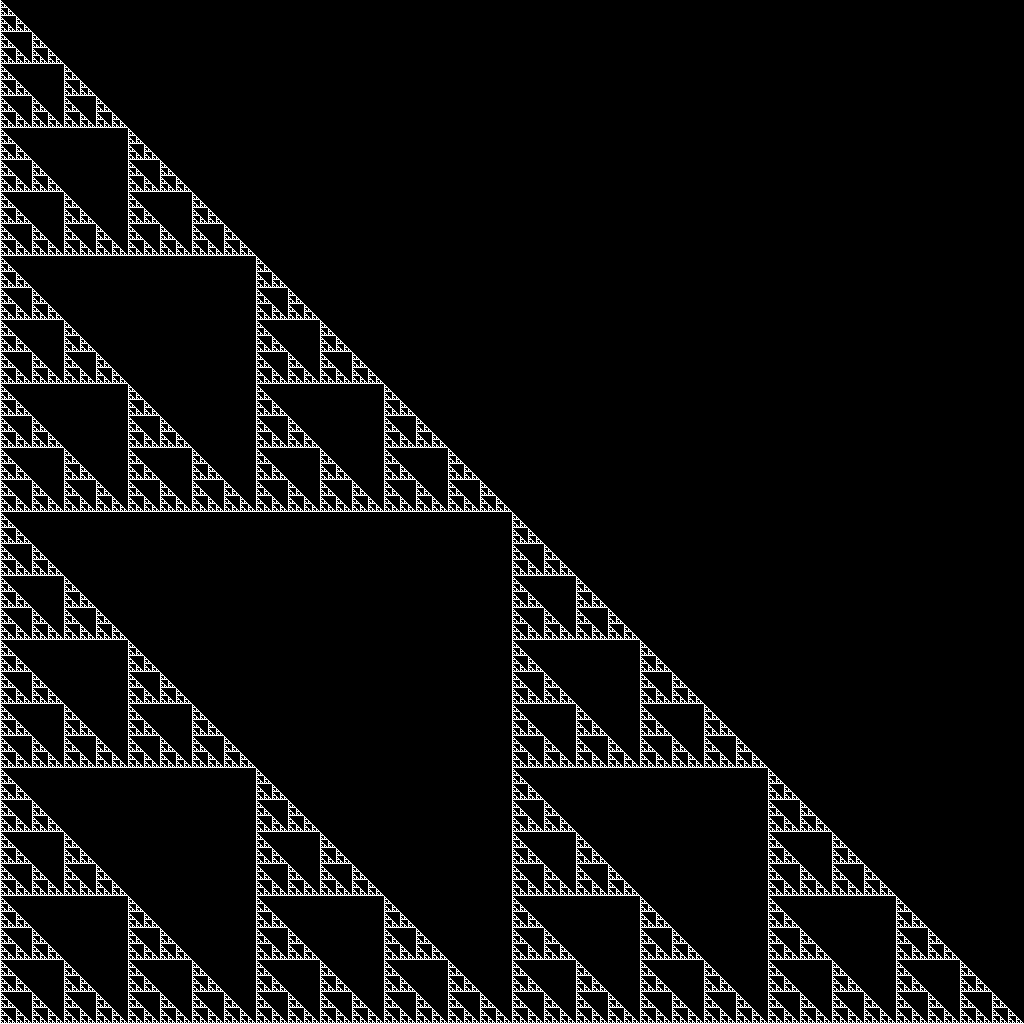

In [267]:
print(ptri(6))
plotModTri(1024,2)

Remark: wtf dawg what? is this the homie sierpiński's trinagle? 

surprise = 10000% rn /gen/ 

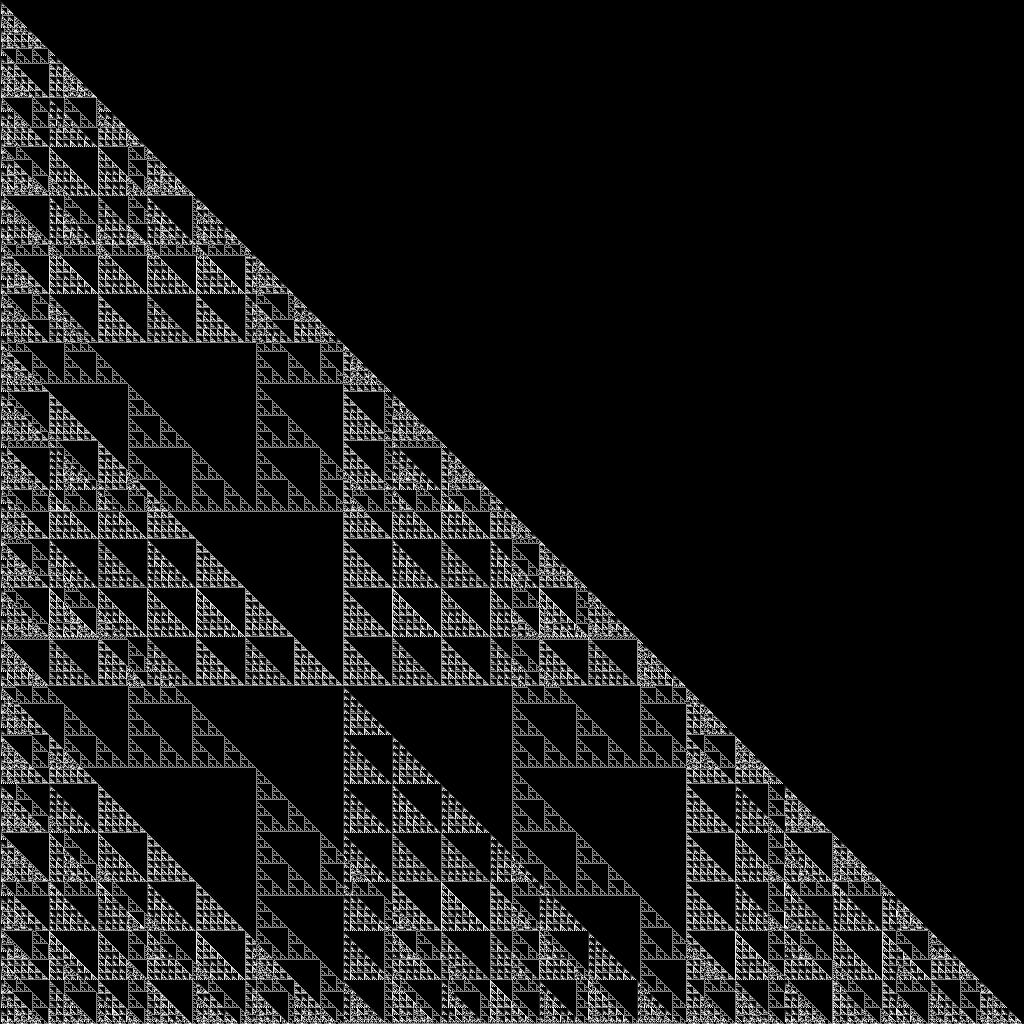

In [294]:
#14 factors into 2,7 looks like the triangles for 2,7 multiplied
# this seems to be the case for prime factorizations generally, see the comments above the code for this
plotModTri(1024, 14)

# Challenge 5

Often when visualizing time-series data, it makes sense to look not at day-by-day changes, but rather at a 7-day rolling average.  For example, when looking at Covid-19 cases, there are reporting fluctuations from day to day, so instead it is usually better to look at the average number of cases over the previous 7 days.

Write a function `def rolling(A, window=7):` which takes as input a one-dimensional numpy array `A`, and a parameter `window` whose default value is `7`.  The function must return an array `R` whose length is shorter than the length of `A`.  The entry `R[j]` should be the **average** of `A[j]`, `A[j+1]`, etc., up to `A[j+window-1]`.  

Then use this function and matplotlib to produce a plot:  a line plot of the array `A` produced below, and a line plot of the 7-day rolling average `R` produced by your function.  These plots should be on the same figure, and clearly labeled.


In [11]:
# Here is the code to produce your test array A.
# Please use this array in your plot!

x_array = np.arange(300)
A = 5*(x_array/200)**2
A = A + np.random.random(len(A))

In [10]:
# Please use this code to import matplotlib.
import matplotlib.pyplot as plt
import numpy as np

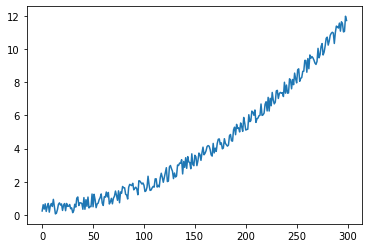

In [275]:
# Here is a plot of the array, to get you started.  
plt.plot(x_array, A)

# Now it's time to write your function to produce the 7-day rolling average, add it to the plot, and make everything clear and labeled.

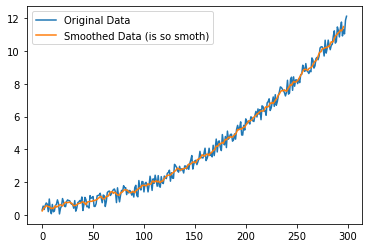

In [31]:
#remark: oooo ty

def rolling(A, window=7):
  kernal = np.ones(window)/window
  R = np.convolve(A,kernal,mode='same') 
  return R[0:s-window//2]

plt.plot(x_array, A, label='Original Data')
R = rolling(A, window = 7)
plt.plot(np.arange(len(R)), R, label='Smoothed Data (is so smoth)')
plt.legend()

I dont know how to feel about submitting solutions to challanges where both solutions use np.convolve. It feels like cheating. But also, I been thinking a lot about convolutions and FFT recently idk i dont want to work with indexes rn please dont mark me down for it :(

I got marked down in another class for using an nd euler matrix argument pls sometimes i just know random crap